In [1]:
# Importing necessary libraries
import numpy as np
from gekko import GEKKO


In [6]:
# Data
xm = np.array([
    18.3447,79.86538,85.09788,10.5211,44.4556,
               69.567,8.960,86.197,66.857,16.875,
               52.2697,93.917,24.35,5.118,25.126,
               34.037,61.4445,42.704,39.531,29.988
])

ym = np.array([
    5.072,7.1588,7.263,4.255,6.282,
               6.9118,4.044,7.2595,6.898,4.8744,
               6.5179,7.3434,5.4316,3.38,5.464,
               5.90,6.80,6.193,6.070,5.737
])


In [3]:
# Regression
m = GEKKO() # remote=False for local mode


In [4]:
# Parameters and variables
a = m.FV(value=0); a.STATUS=1
b = m.FV(value=0); b.STATUS=1
c = m.FV(value=0, lb=-100, ub=100); c.STATUS=1

In [7]:
# Load data
X = m.Param(value=xm)
ymeas = m.Param(value=ym)
ypred = m.Var()


In [10]:
# Define model
m.Equation(ypred == a + b/X + c*m.log(X))
m.Minimize(((ypred-ymeas) / ymeas) ** 2)
m.options.IMODE = 2
m.solve()

apm 85.30.175.12_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            7
   Intermediates:            0
   Connections  :            0
   Equations    :            2
   Residuals    :            2
 
 Number of state variables:             23
 Number of total equations: -           20
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              3
 
 **********************************************
 Model Parameter Estimation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

In [11]:
# Show final objective
print(f'Final SSE Objective: {m.options.objfcnval}')

Final SSE Objective: 0.00036517261744


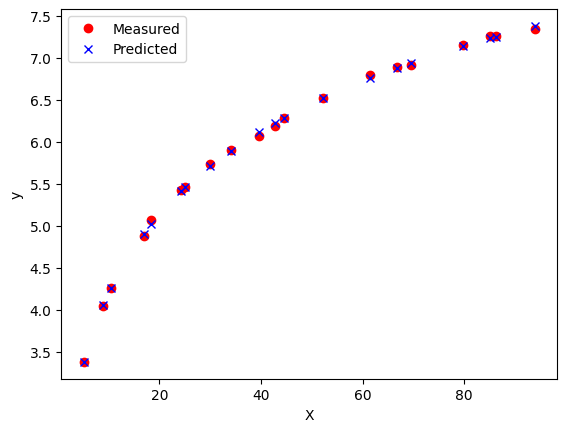

In [13]:
# Print solution
# Importing necessary libraries
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(X,ymeas,'ro')
plt.plot(X,ypred, 'bx')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['Measured', 'Predicted'], loc='best')
plt.savefig('results_GEKKO.png')
plt.show()